### Objetivo

O presente trabalho tem como objetivo estimar e o expoente de Hurst (H) do retorno do índice S&P 500 de 1979 a 2019, por meio do método de análise de reescalonamento, “reescaled-range analysis” ou análise R/S. A estimação do coeficiente de Hurst permite verificar o tipo de correlação de longo alcance em séries temporais.

### Os dados

S&P 500 é a abreviação de Standard & Poor's 500 e também conhecido por "o S&P" trata-se de um índice composto por quinhentos ativos (ações) cotados nas bolsas de NYSE ou NASDAQ, qualificados devido ao seu tamanho de mercado, sua liquidez e sua representação de grupo industrial. É (S&P 500) um índice ponderado de valor de mercado (valor do ativo multiplicado pelo número de ações em circulação) com o peso de cada ativo no índice proporcional ao seu preço de mercado.

### Análise R/S e coeficiente de Hurst

Para estimar o expoente de Hurst, deve-se primeiro estimar a dependência do intervalo reescalonado no intervalo de tempo n de observação. Uma série temporal de comprimento total $N$ é dividida em um número de séries temporais mais curtas de comprimento $n = N,\ N/2,\ N/4,...$ O intervalo médio de reescalonamento é então calculado para cada valor de $n$.

Para uma série temporal (parcial) de comprimento $n$, $X = X_1, X_2,\dots, X_n$, o intervalo de escalonamento é calculado da seguinte forma:

1) Calculando a média para cada janela

$$ m = \frac{1}{n} \sum_{i=1}^n X_i $$

2) Calculando o desvio para cada janela

$$ Y_t = X_t-m,\ para\ t = 1,2,\dots,n.$$

3) Calculando o desvio acumulado para cada janela

$$ Z_t = \sum_{i=1}^t Y_i,\ para\ t = 1,2,\dots,n. $$

4) Calculando a maior diferença de cada janela do desvio acumulado

$$ R_t = \max(Z_1,Z_2,\dots,Z_t)-\min(Z_1,Z_2,\dots,Z_t),\ para\ t = 1,2,\dots,n.$$

5) Calculando o desvio padrão de cada janela do desvio acumulado

$$ S_t = \sqrt{\frac{1}{t}\sum_{i=1}^t (X_i-m)^2},\ para\ t = 1,2,\dots,n. $$

6) Calculando o intervalo redimensionado para cada janela da série histórica

$$ R/S_t = \frac{R_t}{S_t},\ para\ t = 1,2,\dots,n. $$

### Implementação em python

In [1]:
# módulos do python necessários
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Carregando os dados

In [2]:
# importando dados do S&P 500
sp500 = pandas.read_csv('SP500_1979.csv')

# visualizando as primeiras observações do dataset
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1979-04-16,102.000000,102.019997,100.669998,101.120003,101.120003,28050000
1,1979-04-17,101.120003,101.940002,100.650002,101.239998,101.239998,29260000
2,1979-04-18,101.239998,102.230003,100.959999,101.699997,101.699997,29510000
3,1979-04-19,101.699997,102.400002,100.879997,101.279999,101.279999,31150000
4,1979-04-20,101.279999,101.809998,100.459999,101.230003,101.230003,28830000


In [3]:
# verificando os tipos dos dados das variáveis do dataset
sp500.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
# alterando o tipo da variável "Date" para o tipo data
sp500['Date'] = pandas.to_datetime(sp500['Date'])
sp500.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [5]:
# verificando período dos dados
print(sp500['Date'].max())
print(sp500['Date'].min())

2019-04-12 00:00:00
1979-04-16 00:00:00


In [6]:
# criando a variável de retorno
sp500['Return'] = ((sp500['Close']-sp500['Open'])/sp500['Open'])*100
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,1979-04-16,102.000000,102.019997,100.669998,101.120003,101.120003,28050000,-0.862742
1,1979-04-17,101.120003,101.940002,100.650002,101.239998,101.239998,29260000,0.118666
2,1979-04-18,101.239998,102.230003,100.959999,101.699997,101.699997,29510000,0.454365
3,1979-04-19,101.699997,102.400002,100.879997,101.279999,101.279999,31150000,-0.412977
4,1979-04-20,101.279999,101.809998,100.459999,101.230003,101.230003,28830000,-0.049364


### Visualizando a série temporal do retorno de S&P 500

C:\Users\Semantix\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


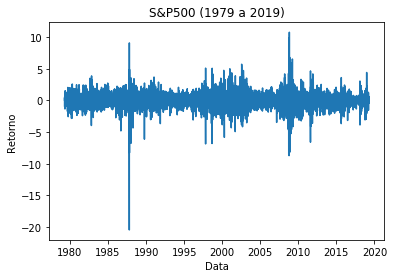

In [7]:
# selecionando as variáveis
sp500_subset = sp500[['Date', 'Return']]

# definindo a coluna de data como o index do dataset sp500_subset
sp500_subset = sp500_subset.set_index('Date')

# gerando visualização da s[erie temporal de retorno
plt.plot(sp500_subset)
plt.ylabel('Retorno')
plt.xlabel('Data')
plt.title('S&P500 (1979 a 2019)')
plt.show()

### Cálculo do expoente de hurst

In [8]:
# explodindo o dataset em 80 intervalos, ou "janelas"
N = []
for i in range(1,81):
    N.append(np.array_split(sp500_subset, i))

In [9]:
# calculando a média de retorno para cada intervalo
mean_N = []
for i in range(len(N)):
    m = []
    for j in range(len(N[i])):
        m.append(N[i][j].mean())
    mean_N.append(m)

In [10]:
# criando série de desvios para cada janela
desv_N = []
for i in range(len(N)):
    d = []
    for j in range(len(N[i])):
        d.append(N[i][j]-mean_N[i][j])
    desv_N.append(d)

In [11]:
# criando série dos desvios médios do retorno acumulado por janela
cumsum = []
for i in range(len(desv_N)):
    c = []
    for j in range(len(desv_N[i])):
        c.append(desv_N[i][j].cumsum(axis=0))
    cumsum.append(c)

In [12]:
# cálculo da maior diferença na série dos desvios acumulado do retorno para cada janela
diff_R = []
for i in range(len(cumsum)):
    diff = []
    for j in range(len(cumsum[i])):
        diff.append(cumsum[i][j].max()-cumsum[i][j].min())
    diff_R.append(diff)

In [13]:
# cálculo do desvio padrão para cada janela
sd_R = []
for i in range(len(cumsum)):
    sd = []
    for j in range(len(cumsum[i])):
        sd.append(stats.sem(cumsum[i][j]))
    sd_R.append(sd)

In [14]:
# cálculo do intervalo redimensionado para cada janela da série histórica
RS_N = []
for i in range(len(diff_R)):
    rs = []
    for j in range(len(diff_R[i])):
        rs.append(diff_R[i][j]/sd_R[i][j])
    RS_N.append(rs)
    
# cálculo da média dos valores das janelas escalonados
RS = []
for i in range(len(RS_N)):
    RS.append(sum(RS_N[i])/len(RS_N[i]))

In [15]:
# tamanho das janelas
n_size = []
for i in range(len(N)):
    n = []
    for j in range(len(N[i])):
        n.append(N[i][j].count())
    n_size.append(n)

nmean_size = []
for i in range(len(n_size)):
    nmean_size.append(sum(n_size[i])/len(n_size[i]))

<function matplotlib.pyplot.show(*args, **kw)>

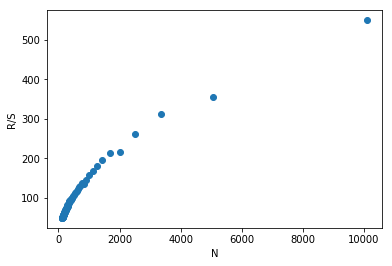

In [16]:
# visualizando R/S x N
plt.scatter(x=nmean_size, y=RS)
plt.ylabel('R/S')
plt.xlabel('N')
plt.show

In [17]:
# calculando os logarítmicos
RSlog = np.log10(RS)
Nlog = np.log10(nmean_size)

In [18]:
# criando data frame para gerar visualização
RS_df = pandas.DataFrame(RSlog)
RS_df.rename(columns={0:'log(R/S)'}, inplace = True) # alterando o nome da coluna
RS_df['id'] = RS_df.index

N_df = pandas.DataFrame(Nlog)
N_df.rename(columns={0:'log(N)'}, inplace = True) # alterando o nome da coluna
N_df['id'] = RS_df.index

df = pandas.merge(RS_df, N_df, on='id')
df.head()

,log(R/S),id,log(N)
0,2.740117,0,4.003762
1,2.552041,1,3.702732
2,2.495482,2,3.526641
3,2.416238,3,3.401702
4,2.332428,4,3.304792


In [19]:
RS[0]

Return    549.689068
dtype: float64

In [20]:
diff_R[0][0]

Return    133.226361
dtype: float64

In [21]:
sd_R[0][0]

array([0.24236676])

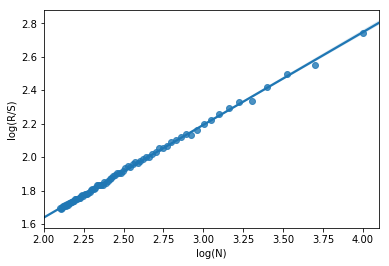

In [22]:
# visualizando a regressão
sns.regplot(x='log(N)', y='log(R/S)', data=df)

In [23]:
# criando o regressor
reg = LinearRegression()

# ajustando o modelo
X = df['log(N)'].as_matrix()
X = X.reshape(-1,1)
y = df['log(R/S)'].as_matrix()
reg.fit(X,y)
print('R²: ', reg.score(X,y))
print('Coeficiente de hurst (H): ', reg.coef_)

R²:  0.998598204848272
Coeficiente de hurst (H):  [0.55406914]


C:\Users\Semantix\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Semantix\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


O parâmetro H, chamado coeficiente de Hurst, representa as propriedades de correlação da série temporal da seguinte maneira:
* Se H = 0,5, não existem correlações de longo alcance presente na série;
* Se 0 < H < 0,5, a série é antipersistente e possui correlações negativas;
* Se 0,5 < H < 1, a série é persistente e possui autocorrelações positivas;